In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
salary_data = pd.read_csv('salaries.csv')
salary_data

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
x=salary_data.drop('salary_more_then_100k', axis=1)
y=salary_data['salary_more_then_100k']

In [4]:
x

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [5]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [6]:
le= LabelEncoder()

In [7]:
x['company']= le.fit_transform(x['company'])
x['job']=le.fit_transform(x['job'])
x['degree']= le.fit_transform(x['degree'])
x

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [10]:
model=DecisionTreeClassifier()

In [12]:
model.fit(x,y)

DecisionTreeClassifier()

In [13]:
y_pred=model.predict(x)

In [14]:
prediction_table=pd.DataFrame({'True y' : y, 'Predicted y': y_pred})
prediction_table

,True y,Predicted y
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,1,1


In [15]:
x.shape

(16, 3)

In [16]:
y.shape

(16,)

In [17]:
model=DecisionTreeClassifier()  # have a prob of overfitting
model.fit(x,y)

DecisionTreeClassifier()

In [18]:
model.score(x,y)

1.0

In [26]:
model= DecisionTreeClassifier(max_depth=3)

In [20]:
model.fit(x,y)

DecisionTreeClassifier(max_depth=3)

In [21]:
model.score(x,y)

0.9375

In [22]:
model.predict([[1,1,1]])

C:\Users\palla\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [23]:
from sklearn import tree

In [24]:
print(tree.export_text(model))

|--- feature_0 <= 0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 1.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  1.00
|   |   |   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_0 <= 1.50
|   |   |--- class: 1
|   |--- feature_0 >  1.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0



[Text(0.4444444444444444, 0.875, 'company <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]\nclass = a'),
 Text(0.2222222222222222, 0.625, 'degree <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = s'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = s'),
 Text(0.3333333333333333, 0.375, 'job <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = s'),
 Text(0.2222222222222222, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = a'),
 Text(0.4444444444444444, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = s'),
 Text(0.6666666666666666, 0.625, 'company <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]\nclass = a'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = a'),
 Text(0.7777777777777778, 0.375, 'job <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = s'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = a'),
 Text(0.8888888888888888, 0.125, 'gini =

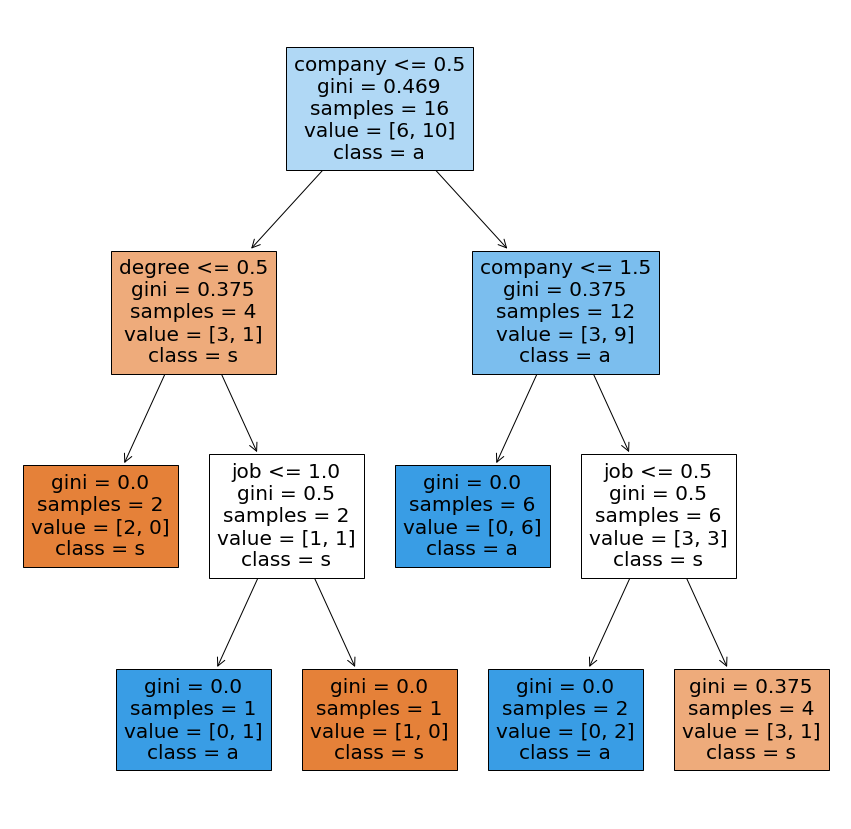

In [25]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names=x.columns, class_names='salary_more_than_100k', filled=True)

In [27]:
# impure node- diff types of nodes, gini index high , gini index means impurity , 
#degree - entropy check chyth split akm, 


In [28]:
from word2number import w2n